In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

TeamNames = ["Arick Smith", "Stephen Engst"]

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [71]:
#Begin by reading in our test and training data. Since the data came in a train and test we don't really need to do a split on the information
#As it's already split.
training_spacetitanic_df = pd.read_csv("train.csv")
testing_spacetitanic_df = pd.read_csv("test.csv")

print(training_spacetitanic_df.shape)
print(len(training_spacetitanic_df))

(8693, 14)
8693


In [72]:
#A simple look at the information
training_spacetitanic_df.sort_index()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [82]:
training_spacetitanic_nan = training_spacetitanic_df.replace("?", np.nan)
testing_spacetitanic_nan = testing_spacetitanic_df.replace("?", np.nan)

print("INFO")
print(training_spacetitanic_nan.info())

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

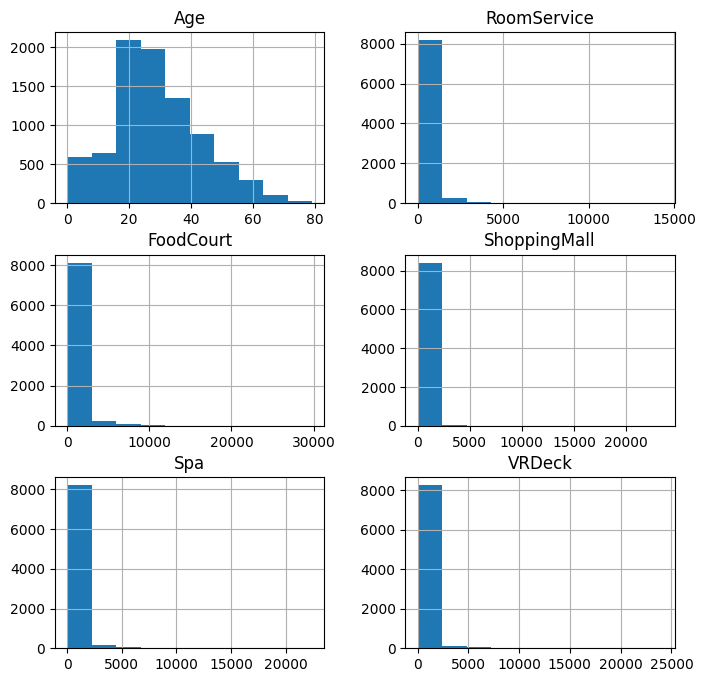

In [81]:
#The numerical data visualized for ease not any of the object columns
training_spacetitanic_df.hist(figsize=(8,8))

In [75]:
#Transformations:
# PassengerId - drop
# HomePlanet - Imputer ordinal
# CryoSleep - Imputer binary
# Cabin - Imputer OneHot Encoder
# Destination - Imputer ordinal
# Age - Imputer Scalar
# VIP - Imputer binary
# RoomService - Imputer Scalar
# FoodCourt - Imputer Scalar
# ShoppingMall - Imputer Scalar
# Spa - Imputer Scalar
# VRDeck - Imputer Scalar
# Name - passtrough
# Transported - binary


In [90]:
ordinal = ["HomePlanet", "Destination"]
binaryList = ["CryoSleep", "VIP"]
#oneHot = ["Cabin"]
scalarInt = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
passThrough = ["Name"]
drop_feat = ["Cabin"]
drop_feat_t = ["PassengerId", "Transported", "Cabin"]

target = "Transported"

In [91]:
X_train = training_spacetitanic_nan.drop(columns=drop_feat_t)
y_train = training_spacetitanic_nan[target]

X_test = testing_spacetitanic_nan.drop(columns=drop_feat)

In [92]:
colpipe = make_column_transformer(
    (
        make_pipeline(SimpleImputer(strategy="median"), StandardScaler()),
        scalarInt,
    ),
    (
        make_pipeline(SimpleImputer(strategy="most_frequent"), OrdinalEncoder()),
        ordinal,
    ),
    (
        make_pipeline(SimpleImputer(strategy="most_frequent"), OrdinalEncoder()),
        binaryList,
    ),
)

In [93]:
transformed = colpipe.fit_transform(X_train)
print(transformed[0:3])
colnames = (
    scalarInt
    + ordinal
    + binaryList
)
colnames


[[ 0.71194537 -0.33310466 -0.28102673 -0.28357863 -0.2706259  -0.26300329
   1.          2.          0.          0.        ]
 [-0.33403748 -0.16807343 -0.27538657 -0.24177071  0.21715825 -0.22420468
   0.          2.          0.          0.        ]
 [ 2.03685698 -0.2680006   1.95999765 -0.28357863  5.69562289 -0.21979574
   1.          2.          0.          1.        ]]


['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'HomePlanet',
 'Destination',
 'CryoSleep',
 'VIP']

In [94]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [95]:
pipedummy = make_pipeline(colpipe, KNeighborsClassifier())

results_dict = {} 

results_dict["kNN"] = mean_std_cross_val_scores(
    pipedummy, X_train, y_train, cv=5, return_train_score=True
) 
pdDum = pd.DataFrame(results_dict["kNN"])
pdDum

,0
fit_time,0.046 (+/- 0.012)
score_time,0.157 (+/- 0.017)
test_score,0.760 (+/- 0.004)
train_score,0.817 (+/- 0.003)


In [104]:
pipedummy.fit(X_train, y_train)

y_pred = pipedummy.predict(X_test)

finalDF = {
        'PassengerId': [
            
        ],
        'Transported': [

        ]
    }

for i in range(len(y_pred)):
    print(str(X_test["PassengerId"][i] + "," + str(y_pred[i])))
    finalDF['PassengerId'].append(X_test['PassengerId'][i])
    finalDF['Transported'].append(y_pred[i])

finalDFWritten = pd.DataFrame(finalDF)    
finalDFWritten.to_csv('first_submission.csv', index=False)

0013_01,False
0018_01,False
0019_01,True
0021_01,True
0023_01,False
0027_01,True
0029_01,True
0032_01,True
0032_02,True
0033_01,False
0037_01,False
0040_01,False
0040_02,True
0042_01,True
0046_01,False
0046_02,False
0046_03,False
0047_01,True
0047_02,True
0047_03,False
0048_01,True
0049_01,False
0054_01,True
0054_02,True
0054_03,True
0055_01,False
0057_01,True
0059_01,True
0060_01,True
0063_01,False
0065_01,True
0075_01,False
0079_01,True
0080_01,True
0083_01,False
0087_01,False
0089_01,True
0093_01,True
0094_01,False
0094_02,False
0095_01,True
0096_01,True
0100_01,True
0100_02,True
0104_01,False
0106_01,True
0109_01,False
0117_01,False
0118_01,True
0121_01,False
0124_01,True
0125_01,True
0125_02,False
0130_01,True
0131_01,True
0132_01,True
0135_01,False
0137_01,False
0142_01,True
0142_02,False
0142_03,True
0143_01,True
0145_01,False
0150_01,True
0150_02,True
0153_01,False
0154_01,True
0155_01,False
0156_01,True
0157_01,False
0158_01,False
0158_02,False
0159_01,False
0161_01,False
0162